<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Умножение-матриц" data-toc-modified-id="Умножение-матриц-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Умножение матриц</a></span></li><li><span><a href="#Алгоритм-преобразования" data-toc-modified-id="Алгоритм-преобразования-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Алгоритм преобразования</a></span></li><li><span><a href="#Проверка-алгоритма" data-toc-modified-id="Проверка-алгоритма-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка алгоритма</a></span><ul class="toc-item"><li><span><a href="#Реализация-алгоритма-преобразования" data-toc-modified-id="Реализация-алгоритма-преобразования-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Реализация алгоритма преобразования</a></span></li><li><span><a href="#Проверка-качества-линейной-регрессии-с-использование-алгоритма-преобразования" data-toc-modified-id="Проверка-качества-линейной-регрессии-с-использование-алгоритма-преобразования-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Проверка качества линейной регрессии с использование алгоритма преобразования</a></span></li></ul></li><li><span><a href="#Общие-выводы" data-toc-modified-id="Общие-выводы-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общие выводы</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

# Защита персональных данных клиентов

Вам нужно защитить данные клиентов страховой компании «Хоть потоп». Разработайте такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию. Обоснуйте корректность его работы.

Нужно защитить данные, чтобы при преобразовании качество моделей машинного обучения не ухудшилось. Подбирать наилучшую модель не требуется.

**Описание данных:**
В датафрейме представлены данные клиентов страховой компании.

**Признаки:** пол, возраст и зарплата застрахованного, количество членов его семьи.

**Целевой признак:**
* `Страховые выплаты` — количество страховых выплат клиенту за последние 5 лет.

## Загрузка данных

Импортируем нужные библиотеки, считаем данные из датасетов и напишем функцию, отвечающую за их первичный анализ.

In [1]:
# перейдем в широкоформатный режим  Jupyterи
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [2]:
# импортируем необходимые библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from numpy.random import RandomState
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [3]:
# Считаем датафрейм
data = pd.read_csv('/datasets/insurance.csv')

In [4]:
# напишем функцию, выполняющую первичный анализ данных
def overview_data(data):
    # выведем первые 20 строк
    display(data.head(20))
    # выведем информацию о датафрейме
    data.info()
    
    # построим общую гистограмму для всех числовых столбцов таблицы
    data.hist(figsize=(15, 20), bins=20);
    plt.show()
    
    # построим диаграммы рассеивания
    sns.pairplot(data);
    plt.show()
    
    # построим тепловую карту матриц корреляции
    f, ax = plt.subplots(figsize=(16, 12))
    sns.heatmap(data.corr(), annot=True, square=True);
    plt.title('Тепловая карта матрицы корреляции')
    plt.show()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0
5,1,43.0,41000.0,2,1
6,1,39.0,39700.0,2,0
7,1,25.0,38600.0,4,0
8,1,36.0,49700.0,1,0
9,1,32.0,51700.0,1,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


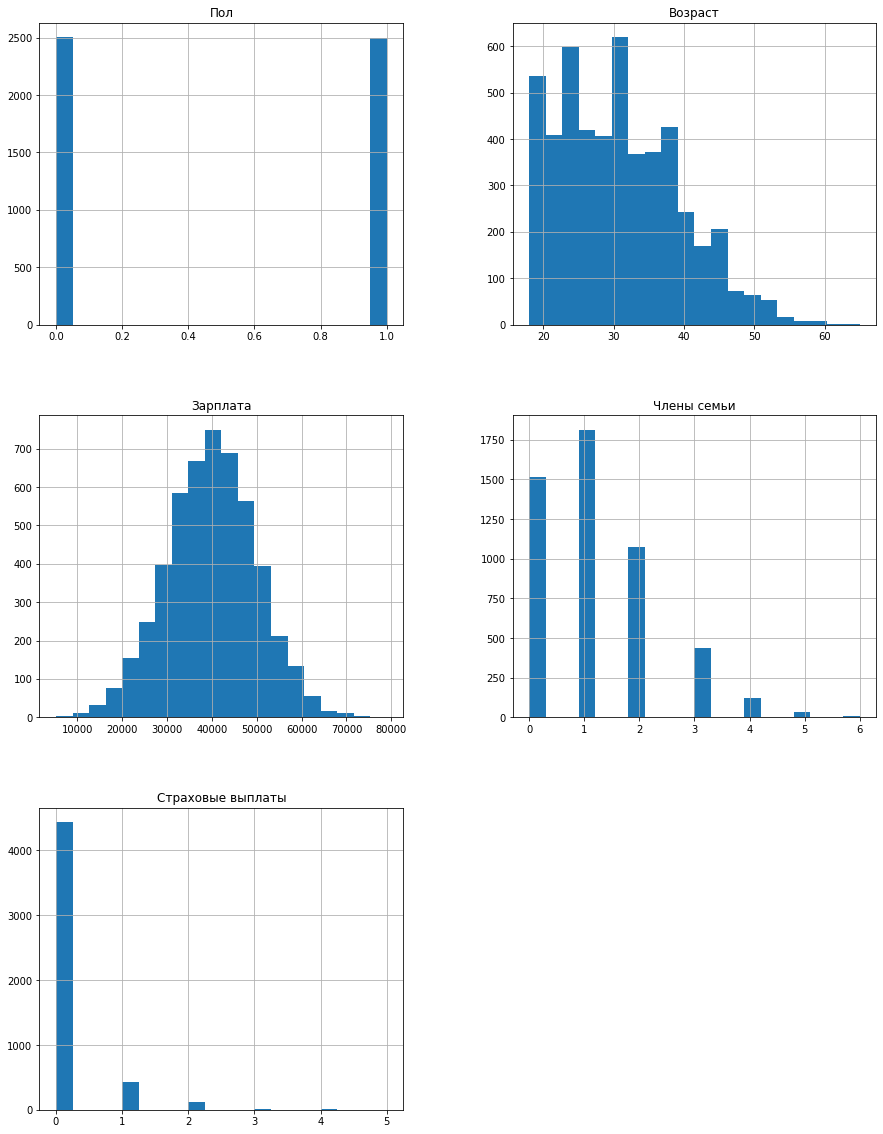

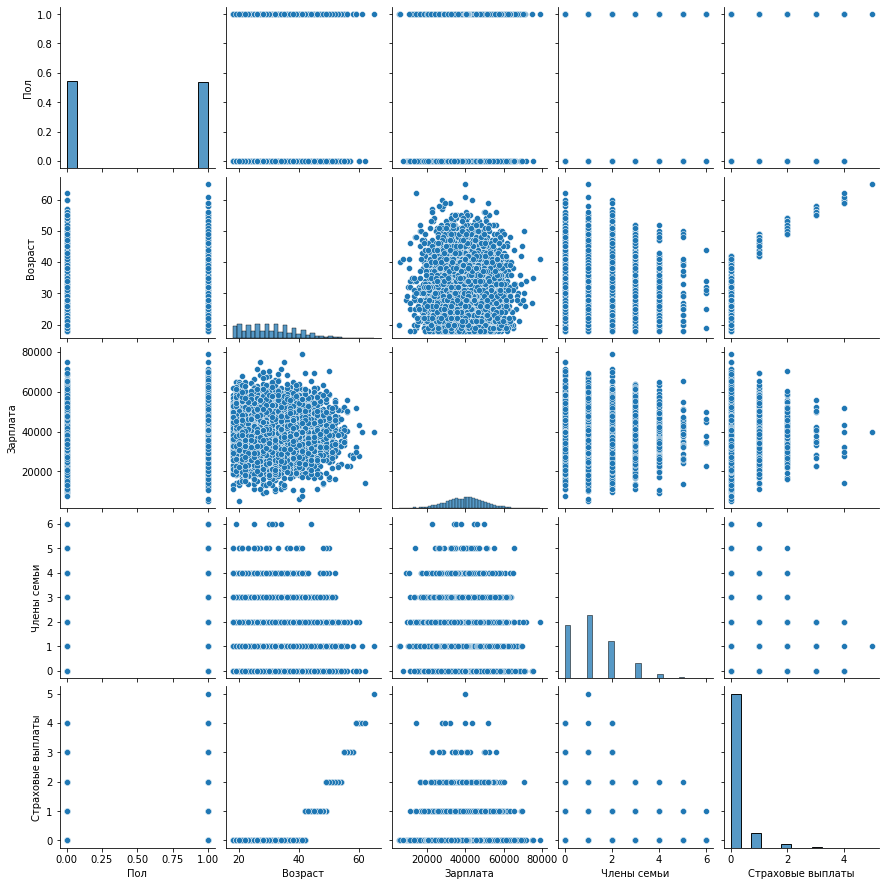

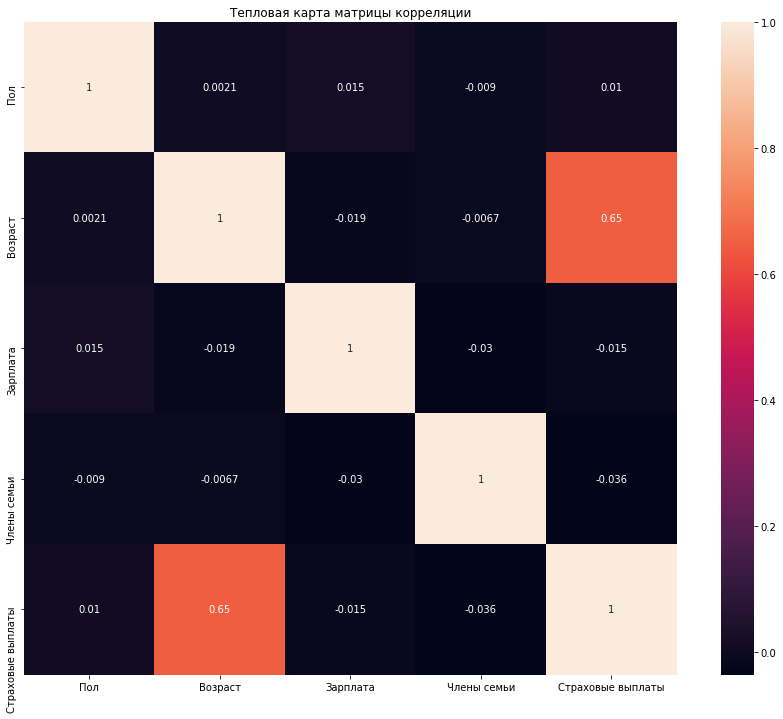

In [5]:
# выполним первичный анализ данных для датафрейма
overview_data(data)

<div style="border:solid green 2px; padding: 20px">
    
* В датафрейме нет пропусков.
* Судя по гистограммам, все признаки содержат адекватные диапазоны значений.
* Наибольшее влияние на количество страховых выплат имеет возраст клиента. Все остальные корреляции признаков слабые.
    
</div>

## Умножение матриц

Посмотрим, изменится ли качество линейной регрессии, если признаки умножат на обратимую матрицу. Модель при этом можно обучить заново. 

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

То есть вопрос в том, изменится ли качетсво линейной регрессии, если линейная регрессия вместо обучения на признаках $ X $ будет обучаться на $ XP $, где $ P $ - обратимая матрица?

**Ответ:** качество линейной регрессии не изменится.

**Обоснование:** Обозначим через $ \tilde X $ преобразованные признаки для новой модели линейной регресии:  $ \tilde X  = XP $, через $ \tilde w $ - новый вектор весов линейной регрессии, через $ \tilde a $ - новый вектор предсказаний модели.

Раскроем  $ \tilde X $ в формуле обучения линейной регрессии:

$$
\tilde w = (\tilde X^T \tilde X)^{-1} \tilde X^T y
$$

$$
\tilde w = ((XP)^T (XP))^{-1} (XP)^T y
$$


<div style="border:solid grey 1px; padding: 20px">
Перед преобразованием формулы вспомним свойства матриц, что транспонирование произведения матриц равно произведению транспонированных матриц в обратном порядке:
    
$$
(AB)^T = B^T A^T
$$
    
Также вспомним, что для обратимых матриц, обратной матрицей к произведению двух матриц является произведение обратных матриц в обратном порядке:
    
$$
(AB)^{-1} = B^{-1} A^{-1}
$$
</div>


Теперь раскроем скобки и применим эти свойства матриц для преобразования формулы обучения:

$$
\tilde w = (P^T X^T X P)^{-1} P^T X^T y
$$

$$
\tilde w = P^{-1} (X^T X)^{-1} (P^T)^{-1} P^T X^T y
$$

$ (P^T)^{-1} P^T $ сократятся, поэтому:

$$
\tilde w = P^{-1} (X^T X)^{-1} X^T y
$$

А по формуле обучения для исходной модели $ (X^T X)^{-1} X^T y = w $, поэтому:

$$
\tilde w = P^{-1} w
$$

Подставим теперь это выбражение в формулу вычисления предсказаний для новой модели:

$$
\tilde A = \tilde X \tilde w = (X P) (P^{-1} w) = X P P^{-1} w
$$

$ P P^{-1} $ сократятся, поэтому:

$$
\tilde A = X w = a
$$

Таким образом, предсказания первой и второй модели совпадают, а значит качество линейной регрессии не изменится.

<div style="border:solid green 2px; padding: 20px">
    
Доказали, что если умножить признаки на произвольную обратимую матрицу, то качество линейной регрессии не изменится. При этом вектор весов линейной регрессии для признаков после преобразования получается путем умножения исходного вектора весов линейной регрессии на обратную матрицу преобразования признаков.
    
</div>

## Алгоритм преобразования

Предложим алгоритм преобразования данных, чтобы по ним было сложно восстановить персональную информацию клиентов. Важно, чтобы при преобразовании качество моделей машинного обучения не ухудшилось. 

**Алгоритм**

1. Пока не получится сгенерировать обратимую матрицу нужного размера, сгенерируем случайную квадратную матрицу с размером стороны, равным количеству признаков без целевого признака. Если при генерации получилась необратимая матрица, заново пробуем сгенерировать нужную матрицу. Чтобы не уйти в вечный цикл, можно заранее установить некоторое число попыток для этого.
2. Получим новые признаки в результате умножения старых признаков без целевого признака на найденную выше обратимую матрицу.
3. Обучим модель линейной регрессии на новых признаках, при рассчете пркдсказаний моделью далее будем домножать признаки на найденную матрицу. 

**Обоснование**

Так как выше было доказано, что качество линейной регрессии не изменится, если признаки умножат на обратимую матрицу, то такой алгоритм преобразования данных будет обеспечивать неизменное качество модели линейной регрессии.

## Проверка алгоритма

### Реализация алгоритма преобразования

Реализуем вышеописанный алгоритм преобразования данных

In [6]:
def transform_features(features):
    # найдем произвольную обратимую матрицу с размером стороны, совпадающим с количеством признаков
    random_state = RandomState(12345)
    for i in range(1, 11):
        try:
            features_count = features.shape[1]
            # сгенерируем произвольную матрицу для преобразования признаков
            transform_matrix = random_state.rand(features_count, features_count)

            # вычислим обратную матрицу, если матрица не обратима, возникнет LinAlgError,
            # тогда на следующей итерации попробуем еще раз
            inversed_transform_matrix = np.linalg.inv(transform_matrix)
            
            # вычислим преобразованные признаки
            transformed_features = np.dot(features, transform_matrix)
            
            # вернем преобразованные признаки и обратную матрицу, чтобы вычислять исходные признаки
            return pd.DataFrame(transformed_features, columns=features.columns), inversed_transform_matrix
        except:
            print(f'На {i} итерации сгенерированная матрица оказалась необратимой')

Проверим, как работает алгоритм преобразования данных. Для этого применим его к признакам из датафрейма, попробуем восстановить признаки с помощью обратной матрицы и сравним их с исходными: 

In [7]:
features = data.drop('Страховые выплаты', axis=1)
target = data['Страховые выплаты']

transformed_features, inversed_transform_matrix = transform_features(features)

display(transformed_features.head())

,Пол,Возраст,Зарплата,Члены семьи
0,37169.983952,32441.905747,37126.682258,47708.455342
1,28484.575966,24863.156593,28457.829124,36560.358528
2,15743.503414,13742.238084,15729.981916,20206.383593
3,31241.345787,27266.582942,31200.559759,40101.520436
4,19563.289157,17075.165256,19542.546847,25108.599330


In [8]:
# сравним исходные признаки и восстановленные после трансформирования и обратного преобразования
print('Исходные признаки')
display(features)
print('Признаки, восстановленные обратным преобразованием после трансформирования')
display(transformed_features.dot(inversed_transform_matrix))

Исходные признаки


,Пол,Возраст,Зарплата,Члены семьи
0,1,41.0,49600.0,1
1,0,46.0,38000.0,1
2,0,29.0,21000.0,0
3,0,21.0,41700.0,2
4,1,28.0,26100.0,0
...,...,...,...,...
4995,0,28.0,35700.0,2
4996,0,34.0,52400.0,1
4997,0,20.0,33900.0,2
4998,1,22.0,32700.0,3


Признаки, восстановленные обратным преобразованием после трансформирования


,0,1,2,3
0,1.000000e+00,41.0,49600.0,1.000000e+00
1,6.751721e-12,46.0,38000.0,1.000000e+00
2,5.722700e-12,29.0,21000.0,3.647693e-12
3,2.189558e-11,21.0,41700.0,2.000000e+00
4,1.000000e+00,28.0,26100.0,1.319332e-11
...,...,...,...,...
4995,4.357851e-12,28.0,35700.0,2.000000e+00
4996,-8.893506e-12,34.0,52400.0,1.000000e+00
4997,1.044647e-11,20.0,33900.0,2.000000e+00
4998,1.000000e+00,22.0,32700.0,3.000000e+00


Заметим, что признаки, восстановленные обратным преобразованием после трансформирования, получились почти такими же, как и исходные признаки, только нули заменены очень близкими значениями.

### Проверка качества линейной регрессии с использование алгоритма преобразования

Проверим, что качество линейной регрессии из sklearn не отличается до и после преобразования. Применим метрику R2. Для этого напишем функцию, которая по переданным признакам и целевому признаку вычисляет R2 и сравним результаты для признаков до и после преобразования:

In [9]:
def calculate_quality(features, target):
    # разделим исходные данные на тренировочную и валидационную выборку в соотношении 75:25.
    features_train, features_valid, target_train, target_valid = train_test_split(
        features, target, test_size=0.25, random_state=12345)
    
    # обучим модель линейной регрессии и вычислим предсказания на валидационной выборке
    model = LinearRegression()
    model.fit(features_train, target_train)
    predictions = model.predict(features_valid)

    # вычислим метрику R2
    r2 = r2_score(target_valid, predictions)
    return r2   

In [10]:
# вычислим качество на исходных признаках
initial_quality = calculate_quality(features, target)
print(f'R2 модели линейной регрессии на исходных признаках {initial_quality:.5f}')

# вычислим качество на преобразованных признаках
transformed_quality = calculate_quality(transformed_features, target)
print(f'R2 модели линейной регрессии на преобразованных признаках {transformed_quality:.5f}')

R2 модели линейной регрессии на исходных признаках 0.43523
R2 модели линейной регрессии на преобразованных признаках 0.43523


На исходных и преобразованных признаках метрика R2 получилась одинаковой, значит, преобразование признаков не повлияло на качество модели линейной регрессии.

<div style="border:solid green 2px; padding: 20px">

* Для защиты данных клиентов был использован алгоритм домножения признаков на произвольную подходящую по размерам обратимую матрицу. Такой алгоритм преобразования данных будет обеспечивать неизменное качество модели линейной регрессии.
* Было проведено сравнение метрики R2 для моделей линейной регрессии на исходных и преобразованных признаках. На них метрика R2 получилась одинаковой, значит, преобразование признаков не повлияло на качество модели линейной регрессии.
</div>

## Общие выводы

<div style="border:solid green 2px; padding: 20px">

* В проекте **требовалось разработать алгоритм преобразования данных, чтобы по ним было сложно восстановить персональную информацию**. Было важно, чтобы **при преобразовании качество моделей машинного обучения не ухудшилось**.
-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
* После обзора данных выявили, что в датафрейме нет пропусков.
* Судя по гистограммам, все признаки содержат адекватные диапазоны значений.
* Наибольшее влияние на количество страховых выплат имеет возраст клиента. Все остальные корреляции признаков слабые.
-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
* Было доказано, что если умножить признаки на произвольную обратимую матрицу, то качество линейной регрессии не изменится. При этом вектор весов линейной регрессии для признаков после преобразования получается путем умножения исходного вектора весов линейной регрессии на обратную матрицу преобразования признаков.  
-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
* **Для защиты данных клиентов был использован алгоритм домножения признаков на произвольную подходящую по размерам обратимую матрицу**. Такой алгоритм преобразования данных **будет обеспечивать неизменное качество модели линейной регрессии**.
* Было проведено **сравнение метрики R2 для моделей линейной регрессии на исходных и преобразованных признаках**. На них **метрика R2 получилась одинаковой, значит, преобразование признаков не повлияло на качество модели линейной регрессии**.
</div>